## Compute Instance

In this sample notebook, we will create a super basic model leveraging our Compute Instance.

Leveraging an Azure ML Compute Instance we can train a model, and leverage it for prediction  

After the model is created, what were the metrics of the model, how well did our model do on predictions, what data set was used for creating the model?  We don't have **traceablity** - but that is where Azure ML will come into play.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import joblib
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


diabetes = pd.read_parquet('./data/diabetes.parquet')
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
PatientID                 10000 non-null int64
Pregnancies               10000 non-null int64
PlasmaGlucose             10000 non-null int64
DiastolicBloodPressure    10000 non-null int64
TricepsThickness          10000 non-null int64
SerumInsulin              10000 non-null int64
BMI                       10000 non-null float64
DiabetesPedigree          10000 non-null float64
Age                       10000 non-null int64
Diabetic                  10000 non-null int64
dtypes: float64(2), int64(8)
memory usage: 781.4 KB


In [2]:
diabetes.describe()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
count,1.000000e+04,10000.00000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.502122e+06,3.25580,107.850200,71.207500,28.81760,139.243600,31.567022,0.400944,30.134100,0.334400
std,2.892868e+05,3.40572,31.920909,16.801478,14.50648,133.777919,9.804366,0.381463,12.106047,0.471804
min,1.000038e+06,0.00000,44.000000,24.000000,7.00000,14.000000,18.200807,0.078044,21.000000,0.000000
25%,1.251672e+06,0.00000,84.000000,58.000000,15.00000,39.000000,21.247427,0.137065,22.000000,0.000000
50%,1.504394e+06,2.00000,105.000000,72.000000,31.00000,85.000000,31.922421,0.199698,24.000000,0.000000
75%,1.754608e+06,6.00000,129.000000,85.000000,41.00000,197.000000,39.328921,0.621158,35.000000,1.000000
max,1.999997e+06,14.00000,192.000000,117.000000,92.00000,796.000000,56.034628,2.301594,77.000000,1.000000


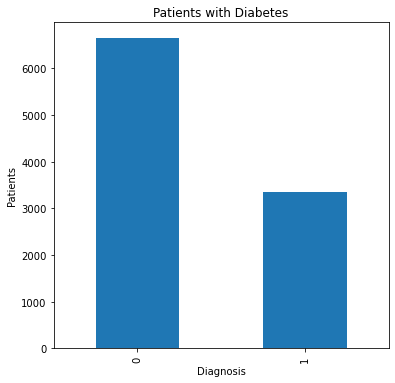

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline 

# Plot and log the count of diabetic vs non-diabetic patients
diabetes = pd.read_parquet('./data/diabetes.parquet')

diabetic_counts = diabetes['Diabetic'].value_counts()
fig = plt.figure(figsize=(6,6))
ax = fig.gca()    
diabetic_counts.plot.bar(ax = ax) 
ax.set_title('Patients with Diabetes') 
ax.set_xlabel('Diagnosis') 
ax.set_ylabel('Patients')
plt.show()

In [4]:

# Get the experiment run context

# load the diabetes dataset
print("Loading Data...")
diabetes = pd.read_parquet('./data/diabetes.parquet')

# Separate features and labels
X, y = diabetes[['Pregnancies','PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI','DiabetesPedigree','Age']].values, diabetes['Diabetic'].values

# Split data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

# Set regularization hyperparameter
reg = 0.01

# Train a logistic regression model
print('Training a logistic regression model with regularization rate of', reg)
model = LogisticRegression(C=1/reg, solver="liblinear").fit(X_train, y_train)

# calculate accuracy
y_hat = model.predict(X_test)
acc = np.average(y_hat == y_test)
print('Accuracy:', acc)

# calculate AUC
y_scores = model.predict_proba(X_test)
auc = roc_auc_score(y_test,y_scores[:,1])
print('AUC: ' + str(auc))


# Save the trained model in the outputs folder
os.makedirs('outputs', exist_ok=True)
joblib.dump(value=model, filename='outputs/diabetes_model.pkl')



Loading Data...
Training a logistic regression model with regularization rate of 0.01
Accuracy: 0.774
AUC: 0.8483203144435048


['outputs/diabetes_model.pkl']

In [5]:
predictions = model.predict(X_test)

In [6]:
# Calculate model performance metrics
from sklearn.metrics import classification_report

report = classification_report(y_test, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.80      0.87      0.84      1990
           1       0.70      0.58      0.63      1010

    accuracy                           0.77      3000
   macro avg       0.75      0.73      0.73      3000
weighted avg       0.77      0.77      0.77      3000



In [7]:
# Confirm model can be reloaded from disk and will generate identical predictions

filename = 'outputs/diabetes_model.pkl'
loaded_model = joblib.load(filename)

y_hat = loaded_model.predict(X_test)
acc = np.average(y_hat == y_test)
print('Accuracy:', acc)


y_scores = loaded_model.predict_proba(X_test)
auc = roc_auc_score(y_test,y_scores[:,1])
print('AUC: ' + str(auc))


Accuracy: 0.774
AUC: 0.8483203144435048
